# **Rainfall Prediction for Hyderabad Location**

Importing all Required Libraries

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as pt
from sklearn.svm import SVC
from collections import Counter
from keras import layers, models
from keras.models import Sequential
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
%matplotlib inline

Loading the dataset

In [2]:
df = pd.read_csv('/content/data_web_scrap_hyderabad_12_23_new2.csv')
df.head()

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition
0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy
1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy
2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy
3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy
4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy


In [3]:
df.shape

(88393, 11)

In [4]:
df.Temperature.unique()

array(['72\xa0°F', '73\xa0°F', '75\xa0°F', '81\xa0°F', '82\xa0°F',
       '77\xa0°F', '79\xa0°F', '84\xa0°F', '86\xa0°F', '88\xa0°F',
       '93\xa0°F', '91\xa0°F', '70\xa0°F', '90\xa0°F', '68\xa0°F',
       '66\xa0°F', '64\xa0°F', '63\xa0°F', '59\xa0°F', '55\xa0°F',
       '54\xa0°F', '61\xa0°F', '46\xa0°F', '45\xa0°F', '48\xa0°F',
       '52\xa0°F', '50\xa0°F', '57\xa0°F', '0\xa0°F', '95\xa0°F',
       '97\xa0°F', '99\xa0°F', '100\xa0°F', '102\xa0°F', '104\xa0°F',
       '106\xa0°F', '108\xa0°F', '109\xa0°F', '-22\xa0°F', '-24\xa0°F',
       'Temperature', '111\xa0°F', '113\xa0°F', '115\xa0°F', '117\xa0°F'],
      dtype=object)

Removing Unnecessary rows

In [5]:
df[df.Temperature == 'Temperature']

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition
4885,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition


In [6]:
df1 = df[df.Date != 'Date']
df1.head()

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition
0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy
1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy
2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy
3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy
4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy


## **Cleaning The Data**

Removing the characters or any symbols from the numerical columns

In [7]:
df1.groupby('Temperature')['Temperature'].agg('count')

Temperature
-22 °F       1
-24 °F       1
0 °F       997
100 °F    1267
102 °F    1082
104 °F     877
106 °F     645
108 °F     362
109 °F     202
111 °F      40
113 °F      10
115 °F       2
117 °F       1
45 °F        2
46 °F        2
48 °F       12
50 °F       26
52 °F       55
54 °F       92
55 °F      175
57 °F      173
59 °F      315
61 °F      369
63 °F      543
64 °F      658
66 °F      870
68 °F     1081
70 °F     2024
72 °F     3221
73 °F     4746
75 °F     6030
77 °F     7180
79 °F     7368
81 °F     7704
82 °F     7579
84 °F     7034
86 °F     5838
88 °F     4934
90 °F     3938
91 °F     2980
93 °F     2539
95 °F     2131
97 °F     1736
99 °F     1550
Name: Temperature, dtype: int64

In [8]:
df1['Temperature1'] = df1['Temperature'].apply(lambda x: float(x[0:-2]))
df1.head()

<ipython-input-8-d561ad6c8347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Temperature1'] = df1['Temperature'].apply(lambda x: float(x[0:-2]))


,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1
0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,72.0
1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,72.0
2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,73.0
3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,75.0
4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,75.0


In [9]:
df1.shape, df.shape

((88392, 12), (88393, 11))

In [10]:
df1['Temperature1'] = 5/9*(df1['Temperature1'] - 32)
df1.head()

<ipython-input-10-17f6da7fd8d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Temperature1'] = 5/9*(df1['Temperature1'] - 32)


,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1
0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222
1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222
2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778
3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889
4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889


For wind check link
https://www.weather.gov/pqr/wind

In [11]:
df1.isnull().sum()

Date               0
Time               0
Temperature        0
Dew Point          0
Humidity           0
Wind             137
Wind Speed         0
Wind Gust          0
Pressure           0
Precipitation      0
Condition          0
Temperature1       0
dtype: int64

In [12]:
df1.groupby('Pressure')['Pressure'].agg('count')

Pressure
0.00 °in      117
26.29 °in       1
26.31 °in       1
26.37 °in       2
26.45 °in       1
27.61 °in       3
27.64 °in      12
27.67 °in      18
27.70 °in     103
27.73 °in     177
27.75 °in     721
27.78 °in    1300
27.81 °in    2642
27.84 °in    4309
27.86 °in    5741
27.89 °in    6650
27.92 °in    5446
27.95 °in    6897
27.97 °in    5830
28.00 °in    5050
28.03 °in    5811
28.06 °in    6197
28.09 °in    5905
28.11 °in    6568
28.14 °in    5906
28.17 °in    5219
28.20 °in    3247
28.22 °in    2304
28.25 °in    1287
28.28 °in     637
28.31 °in     215
28.33 °in      63
28.36 °in       7
28.47 °in       1
28.50 °in       1
28.53 °in       1
29.47 °in       1
53.15 °in       1
Name: Pressure, dtype: int64

###### Checking for Null Values and Removing them

<Axes: >

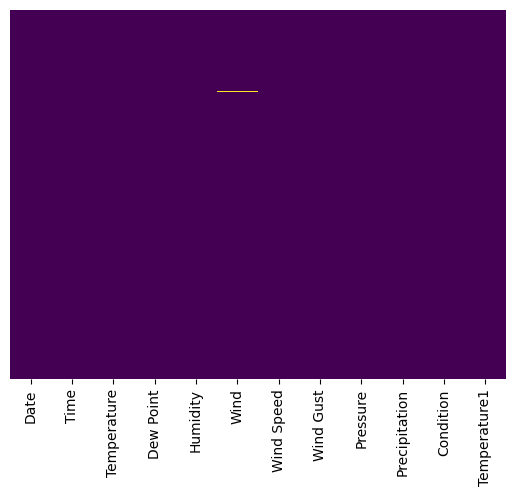

In [13]:
sb.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
null_rows = df1[df1.isna().any(axis = 1)]
null_rows.head()

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1
42,2012-01-04,7:10 AM,91 °F,64 °F,41 °%,NaN,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,32.777778
77,2012-01-07,7:10 AM,90 °F,59 °F,36 °%,NaN,0 °mph,0 °mph,28.17 °in,0.0 °in,Fair,32.222222
79,2012-01-07,9:10 AM,91 °F,59 °F,34 °%,NaN,0 °mph,0 °mph,28.11 °in,0.0 °in,Fair,32.777778
182,2012-01-15,8:10 AM,82 °F,36 °F,19 °%,NaN,0 °mph,0 °mph,28.06 °in,0.0 °in,Fair,27.777778
210,2012-01-17,9:10 AM,90 °F,45 °F,21 °%,NaN,0 °mph,0 °mph,27.95 °in,0.0 °in,Fair,32.222222


In [15]:
def wind(x):
    try:
        return float(x[0:-4])
    except:
        a = x[0:-4].replace(',', '')
        return float(a)

In [16]:
df1['Wind Speed1'] = df1['Wind Speed'].apply(wind)
df1.head()

<ipython-input-16-70c27fe86e27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Wind Speed1'] = df1['Wind Speed'].apply(wind)


,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1
0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0
1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0
2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0
3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0
4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0


In [17]:
df1.groupby('Wind Speed1')['Wind Speed1'].agg('count')

Wind Speed1
0.0        9982
1.0        1454
2.0        9689
3.0       14932
5.0       12410
6.0       13072
7.0        9739
8.0        3291
9.0        5160
10.0       1347
12.0       3589
13.0        710
14.0       1756
15.0        307
16.0        486
17.0        258
18.0         93
20.0         27
21.0         21
22.0          5
23.0         11
24.0          1
26.0          4
29.0          2
35.0          1
37.0          4
39.0          2
41.0          1
46.0          2
47.0          1
48.0          1
49.0          3
53.0          1
58.0          4
62.0          2
64.0          1
67.0          1
72.0          2
74.0          1
77.0          1
78.0          1
86.0          1
87.0          1
90.0          1
102.0         1
112.0         1
114.0         1
115.0         1
117.0         1
120.0         1
122.0         1
123.0         1
124.0         1
127.0         1
163.0         1
351.0         1
1036.0        1
1054.0        1
Name: Wind Speed1, dtype: int64

In [18]:
Wind_Speed1 = df1['Wind Speed1'].tolist()


In [19]:
l = []
for i in Wind_Speed1:
    if i < 30:
        l.append(i)

# **Data Visualization**

<Axes: ylabel='Count'>

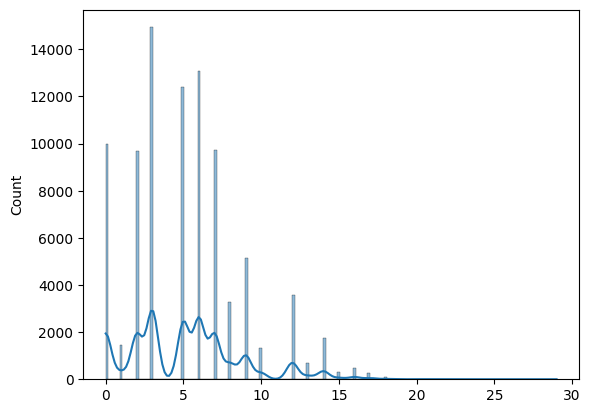

In [20]:
sb.histplot(x = l, kde = True)

<Axes: >

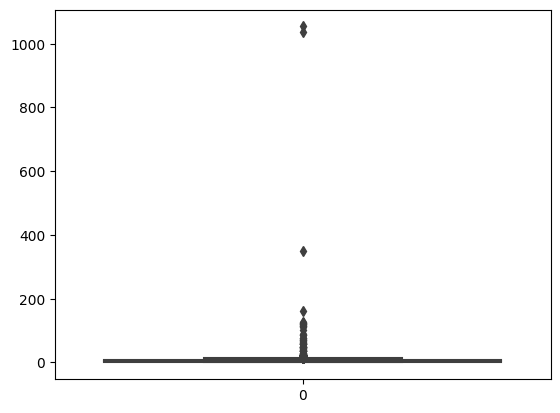

In [21]:
sb.boxplot(Wind_Speed1)

<Axes: xlabel='Temperature1', ylabel='Count'>

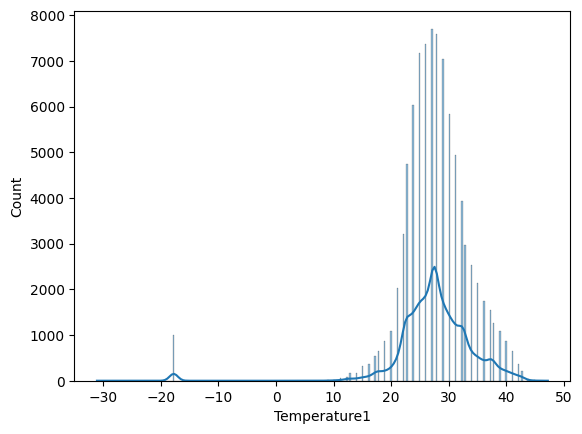

In [22]:
sb.histplot(data = df1, x = 'Temperature1', kde = True)

In [23]:
df1['Pressure1'] = df1['Pressure'].apply(lambda x: float(x[0:-3]))
df1.head()

<ipython-input-23-842a4f98472b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pressure1'] = df1['Pressure'].apply(lambda x: float(x[0:-3]))


,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1
0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09
1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11
2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14
3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17
4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20


In [24]:
df1.groupby('Humidity')['Humidity'].agg('count')

Humidity
0 °%      1010
100 °%    2287
10 °%       94
11 °%      116
12 °%      228
          ... 
89 °%     3463
8 °%        22
93 °%        1
94 °%     4565
9 °%        42
Name: Humidity, Length: 83, dtype: int64

In [25]:
df1['Humidity1'] = df1['Humidity'].apply(lambda x: int(x[0:-2]))
df1.head()

<ipython-input-25-1906c5c8b802>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Humidity1'] = df1['Humidity'].apply(lambda x: int(x[0:-2]))


,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1
0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09,88
1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11,88
2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14,78
3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17,78
4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20,78


In [26]:
df1.corr()

<ipython-input-26-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Temperature1,Wind Speed1,Pressure1,Humidity1
Temperature1,1.000000,0.085140,-0.029026,-0.299237
Wind Speed1,0.085140,1.000000,-0.023606,-0.008361
Pressure1,-0.029026,-0.023606,1.000000,-0.006140
Humidity1,-0.299237,-0.008361,-0.006140,1.000000


In [27]:
df1.groupby('Condition')['Condition'].agg('count')

Condition
Cloudy                      1268
Cloudy / Windy                 2
Drizzle                      280
Drizzle / Windy                2
Drizzle and Fog                1
Fair                       19999
Fair / Windy                  12
Fog                         6139
Fog / Windy                    2
Haze                       28374
Haze / Windy                  29
Heavy Rain                    33
Heavy T-Storm                 26
Light Drizzle               1792
Light Drizzle / Windy          1
Light Rain                  1151
Light Rain / Windy             1
Light Rain Shower              1
Light Rain with Thunder      581
Mist                           6
Mostly Cloudy              10773
Mostly Cloudy / Windy         11
Partly Cloudy              16848
Partly Cloudy / Windy         19
Rain                         447
Rain / Windy                   5
Rain Shower                    2
Showers in the Vicinity        9
Smoke                          6
T-Storm                      301


In [28]:
type(df1.groupby('Condition')['Condition'].agg('count'))

pandas.core.series.Series

In [29]:
df2 = df1.copy()
df2.head()

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1
0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09,88
1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11,88
2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14,78
3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17,78
4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20,78


In [30]:
df2.reset_index(level = 0, inplace = True)

In [31]:
df2.rename(columns = {'index':'Index'}, inplace = True)
df2.head()

,Index,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1
0,0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09,88
1,1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11,88
2,2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14,78
3,3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17,78
4,4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20,78


In [32]:
Cond_df = df2.groupby('Condition')['Index'].agg('count').reset_index()

In [33]:
Cond_df

,Condition,Index
0,Cloudy,1268
1,Cloudy / Windy,2
2,Drizzle,280
3,Drizzle / Windy,2
4,Drizzle and Fog,1
5,Fair,19999
6,Fair / Windy,12
7,Fog,6139
8,Fog / Windy,2
9,Haze,28374





Rain ---> 1

Not Rain ---> 0

In [34]:
condi = Cond_df.Condition.to_list()
condi

['Cloudy',
 'Cloudy / Windy',
 'Drizzle',
 'Drizzle / Windy',
 'Drizzle and Fog',
 'Fair',
 'Fair / Windy',
 'Fog',
 'Fog / Windy',
 'Haze',
 'Haze / Windy',
 'Heavy Rain',
 'Heavy T-Storm',
 'Light Drizzle',
 'Light Drizzle / Windy',
 'Light Rain',
 'Light Rain / Windy',
 'Light Rain Shower',
 'Light Rain with Thunder',
 'Mist',
 'Mostly Cloudy',
 'Mostly Cloudy / Windy',
 'Partly Cloudy',
 'Partly Cloudy / Windy',
 'Rain',
 'Rain / Windy',
 'Rain Shower',
 'Showers in the Vicinity',
 'Smoke',
 'T-Storm',
 'T-Storm / Windy',
 'Thunder',
 'Thunder / Windy',
 'Widespread Dust',
 'Widespread Dust / Windy']

# **Labelling the Target Values**

In [35]:
df2['Rain_01'] = df2['Condition'].replace(['Cloudy', 'Cloudy / Windy', 'Fair', 'Fair / Windy', 'Fog', 'Fog / Windy',
                                          'Haze', 'Haze / Windy', 'Mist', 'Mostly Cloudy', 'Mostly Cloudy / Windy',
                                          'Partly Cloudy', 'Partly Cloudy / Windy', 'Smoke', 'Widespread Dust',
                                          'Widespread Dust / Windy'], '0')


In [36]:
df2.Rain_01.unique()

array(['0', 'Light Drizzle', 'Thunder', 'Light Rain with Thunder', 'Rain',
       'Light Rain', 'Showers in the Vicinity', 'T-Storm', 'Drizzle',
       'Thunder / Windy', 'Rain / Windy', 'T-Storm / Windy',
       'Heavy T-Storm', 'Light Rain Shower', 'Heavy Rain', 'Rain Shower',
       'Drizzle / Windy', 'Drizzle and Fog', 'Light Rain / Windy',
       'Light Drizzle / Windy'], dtype=object)

In [37]:
df2['Rain_01'] = df2['Rain_01'].replace(['Light Drizzle', 'Thunder', 'Light Rain with Thunder', 'Rain',
       'Light Rain', 'Showers in the Vicinity', 'T-Storm', 'Drizzle',
       'Thunder / Windy', 'Rain / Windy', 'T-Storm / Windy',
       'Heavy T-Storm', 'Light Rain Shower', 'Heavy Rain', 'Rain Shower',
       'Drizzle / Windy', 'Drizzle and Fog', 'Light Rain / Windy',
       'Light Drizzle / Windy'], 1)

In [38]:
df2.Rain_01.unique()

array(['0', 1], dtype=object)

In [39]:
df2['Rain_01'] = df2['Rain_01'].replace(['0'], 0)

In [40]:
df2['Pressure_atm'] = df2['Pressure1']/29.92

In [41]:
df2.head()

,Index,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm
0,0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09,88,0,0.938837
1,1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11,88,0,0.939505
2,2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14,78,0,0.940508
3,3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17,78,0,0.941511
4,4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20,78,0,0.942513


# Features units 

Temperature is in C

Wind Speed is in mph(Meter per Hour)

Pressure_atm is in atmosperic pressure

1 atm = 29.92 inHg ----> inHg is inches in Hg(Mercury)

Humidity is in percentage

Rain: 
    
    0 ---> No Rain
    1 ---> Raining

In [42]:
df2.Rain_01.unique()

array([0, 1])

In [43]:
df2.groupby('Rain_01')['Index'].agg('count').reset_index()

,Rain_01,Index
0,0,83493
1,1,4899


In [44]:
df2.dropna(inplace = True)

In [45]:
df2.shape

(88255, 18)

In [46]:
df2.describe()

,Index,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm
count,88255.000000,88255.000000,88255.000000,88255.000000,88255.000000,88255.000000,88255.000000
mean,44244.508243,27.518397,5.244099,27.976332,58.195422,0.055487,0.935038
std,25499.161898,7.038841,6.432806,1.008818,23.492634,0.228930,0.033717
min,0.000000,-31.111111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22169.500000,25.000000,3.000000,27.920000,40.000000,0.000000,0.933155
50%,44253.000000,27.777778,5.000000,28.000000,58.000000,0.000000,0.935829
75%,66327.500000,31.111111,7.000000,28.110000,78.000000,0.000000,0.939505
max,88392.000000,47.222222,1054.000000,53.150000,100.000000,1.000000,1.776404


# **Removal of Outliers**

Removing the outliers using gaussian method, IQR method and using some transformations

<Axes: xlabel='Pressure_atm', ylabel='Count'>

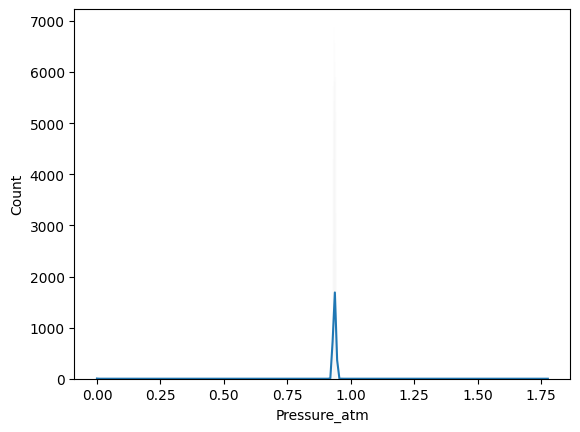

In [47]:
sb.histplot(data = df2, x = 'Pressure_atm', kde = True)

<Axes: xlabel='Pressure', ylabel='Count'>

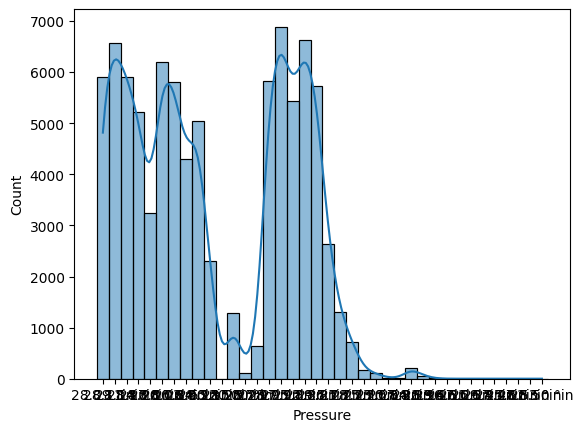

In [48]:
sb.histplot(data = df2, x = 'Pressure', kde = True)

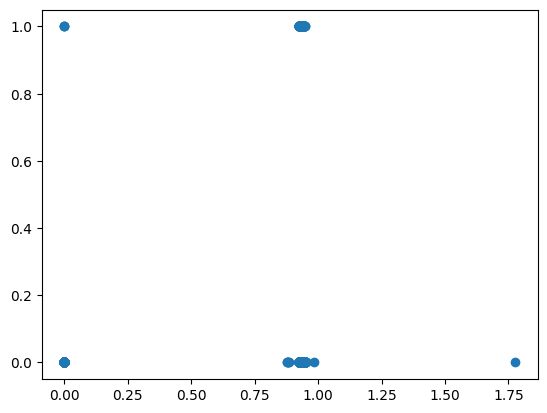

In [49]:
pt.scatter(x = df2.Pressure_atm, y = df2.Rain_01)

In [50]:
df3 = df2.copy()

In [51]:
ka = df3.Pressure_atm
type(ka)

pandas.core.series.Series

In [52]:
def removal_outliers(df, clm):
    q1, q3 = np.percentile(df[clm], [25, 75])
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    upp = q3 + 1.5*iqr
    lst = df[clm]
    for i in lst:
        if i < low or i > upp:
            df = df[df[clm] != i]
    return df

In [53]:
df4 = removal_outliers(df3, 'Pressure_atm')
df4.head()

,Index,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm
0,0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09,88,0,0.938837
1,1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11,88,0,0.939505
2,2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14,78,0,0.940508
3,3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17,78,0,0.941511
4,4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20,78,0,0.942513


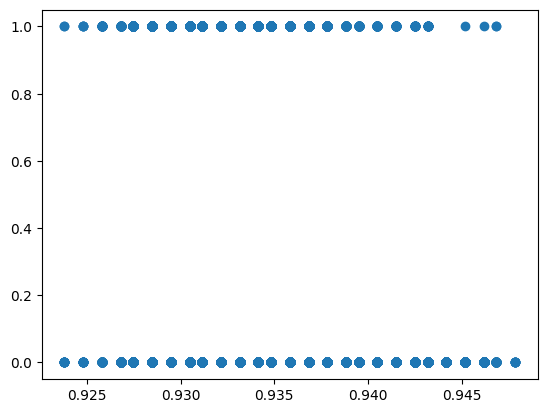

In [54]:
pt.scatter(x = df4.Pressure_atm, y = df4.Rain_01)

In [55]:
df4.shape

(88130, 18)

In [56]:
88255 - 88130

125

In [57]:
df3.groupby('Pressure_atm')['Pressure_atm'].agg('count')

Pressure_atm
0.000000     112
0.878676       1
0.879345       1
0.881350       2
0.884024       1
0.922794       3
0.923797      12
0.924799      18
0.925802     103
0.926805     177
0.927473     721
0.928476    1296
0.929479    2633
0.930481    4298
0.931150    5729
0.932152    6634
0.933155    5433
0.934158    6887
0.934826    5818
0.935829    5048
0.936832    5802
0.937834    6193
0.938837    5896
0.939505    6561
0.940508    5902
0.941511    5212
0.942513    3245
0.943182    2303
0.944184    1287
0.945187     637
0.946190     215
0.946858      63
0.947861       7
0.951537       1
0.952540       1
0.953543       1
0.984960       1
1.776404       1
Name: Pressure_atm, dtype: int64

In [58]:
df4.describe()

,Index,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm
count,88130.000000,88130.000000,88130.000000,88130.000000,88130.000000,88130.000000,88130.000000
mean,44280.360116,27.519000,5.244026,28.011670,58.202201,0.055532,0.936219
std,25487.253536,7.038152,6.435751,0.125921,23.492718,0.229016,0.004209
min,0.000000,-31.111111,0.000000,27.640000,0.000000,0.000000,0.923797
25%,22233.250000,25.000000,3.000000,27.920000,40.000000,0.000000,0.933155
50%,44296.500000,27.777778,5.000000,28.000000,58.000000,0.000000,0.935829
75%,66349.750000,31.111111,7.000000,28.110000,78.000000,0.000000,0.939505
max,88392.000000,47.222222,1054.000000,28.360000,100.000000,1.000000,0.947861


In [59]:
df4.shape

(88130, 18)

<Axes: xlabel='Temperature1', ylabel='Count'>

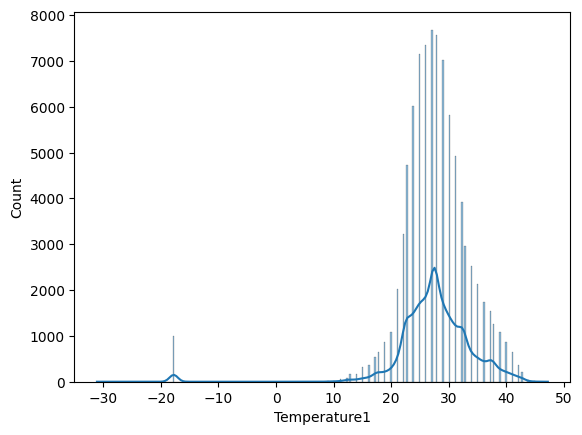

In [60]:
sb.histplot(data = df4, x = 'Temperature1', kde = True)

In [61]:
df4['log_Temp1'] = np.log(df4.Temperature1)
df4.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Index,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm,log_Temp1
0,0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09,88,0,0.938837,3.101093
1,1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11,88,0,0.939505,3.101093
2,2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14,78,0,0.940508,3.125785
3,3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17,78,0,0.941511,3.173413
4,4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20,78,0,0.942513,3.173413


<Axes: xlabel='log_Temp1', ylabel='Count'>

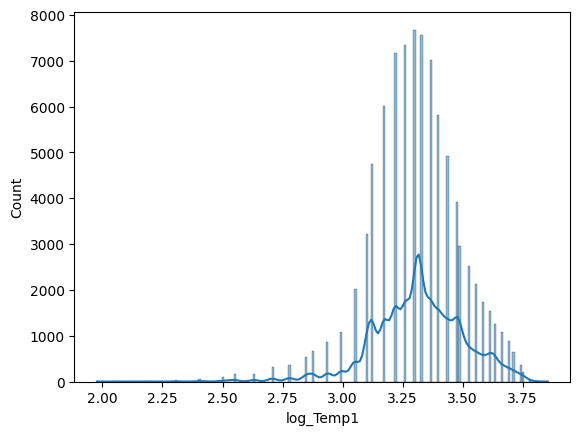

In [62]:
sb.histplot(data = df4, x = 'log_Temp1', kde = True)

In [63]:
df4['sqrt_Temp1'] = np.sqrt(df4.Temperature1)
df4.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Index,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm,log_Temp1,sqrt_Temp1
0,0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09,88,0,0.938837,3.101093,4.714045
1,1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11,88,0,0.939505,3.101093,4.714045
2,2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14,78,0,0.940508,3.125785,4.772607
3,3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17,78,0,0.941511,3.173413,4.887626
4,4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20,78,0,0.942513,3.173413,4.887626


<Axes: xlabel='sqrt_Temp1', ylabel='Count'>

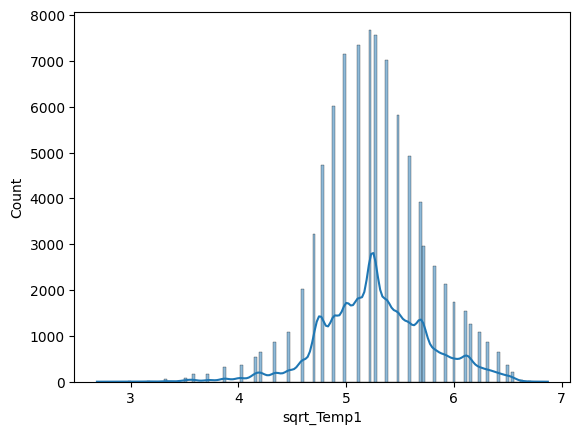

In [64]:
sb.histplot(data = df4, x = 'sqrt_Temp1', kde = True)

Red lines are 3 standard deviations from the mean

Blue line is the mean

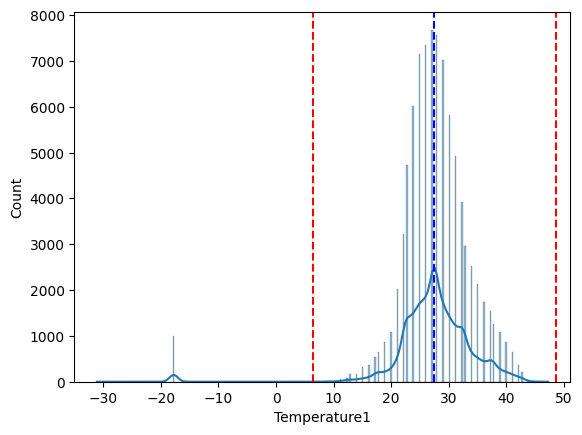

In [65]:

def graph(df, clm):
    # Generate some random data that follows a normal distribution
    data = df[clm]

    # Create a histogram of the data
    sb.histplot(data, kde=True)

    # Calculate the mean and standard deviation of the data
    mean = np.mean(data)
    std_dev = np.std(data)


    left_bound = mean - (3 * std_dev)
    right_bound = mean + (3 * std_dev)


    pt.axvline(x=left_bound, color='r', linestyle='--')
    pt.axvline(x = mean, color = 'b', linestyle = '--')
    pt.axvline(x=right_bound, color='r', linestyle='--')

    # Show the plot
    pt.show()

graph(df4, 'Temperature1')

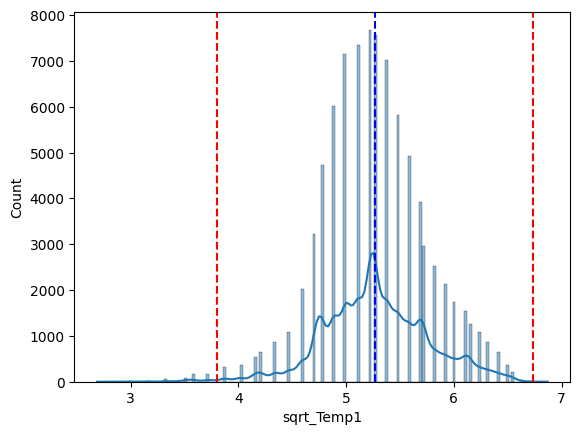

In [66]:
graph(df4, 'sqrt_Temp1')

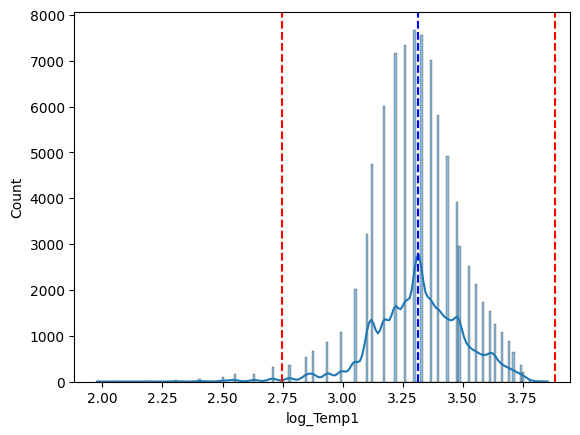

In [67]:
graph(df4, 'log_Temp1')

In [68]:
def outlier_detc(df, clm):
    m = np.mean(df[clm])
    sd = np.std(df[clm])
    l = df[clm]
    for i in l:
        z = (i - m)/sd
        if z > 3 or z < -3:
            df = df[df[clm] != i]
    return df


In [69]:
df4 = outlier_detc(df4, 'Temperature1')
df4.head()

,Index,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm,log_Temp1,sqrt_Temp1
0,0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09,88,0,0.938837,3.101093,4.714045
1,1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11,88,0,0.939505,3.101093,4.714045
2,2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14,78,0,0.940508,3.125785,4.772607
3,3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17,78,0,0.941511,3.173413,4.887626
4,4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20,78,0,0.942513,3.173413,4.887626


In [70]:
df4.shape

(87137, 20)

In [71]:
df4.groupby('Temperature1')['Temperature1'].agg('count')

Temperature1
7.222222        2
7.777778        2
8.888889       12
10.000000      26
11.111111      54
12.222222      92
12.777778     174
13.888889     171
15.000000     315
16.111111     369
17.222222     542
17.777778     657
18.888889     870
20.000000    1080
21.111111    2022
22.222222    3215
22.777778    4737
23.888889    6020
25.000000    7160
26.111111    7342
27.222222    7679
27.777778    7560
28.888889    7017
30.000000    5819
31.111111    4918
32.222222    3920
32.777778    2960
33.888889    2530
35.000000    2122
36.111111    1731
37.222222    1546
37.777778    1263
38.888889    1076
40.000000     875
41.111111     644
42.222222     360
42.777778     202
43.888889      40
45.000000      10
46.111111       2
47.222222       1
Name: Temperature1, dtype: int64

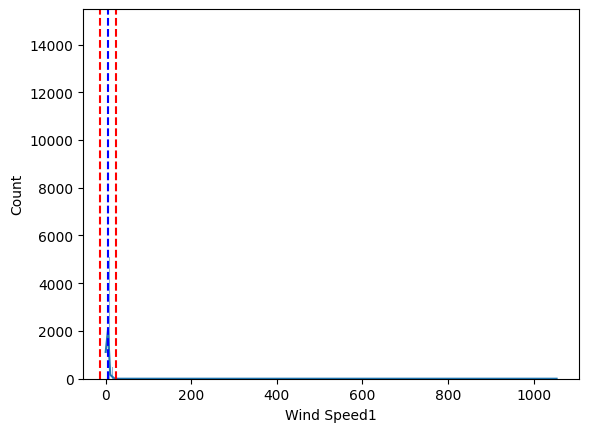

In [72]:
graph(df4, 'Wind Speed1')

In [73]:
df4 = outlier_detc(df4, 'Wind Speed1')
df4.shape

(87088, 20)

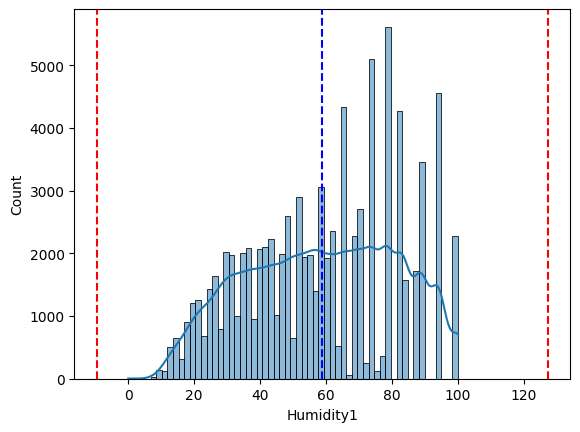

In [74]:
graph(df4, 'Humidity1')

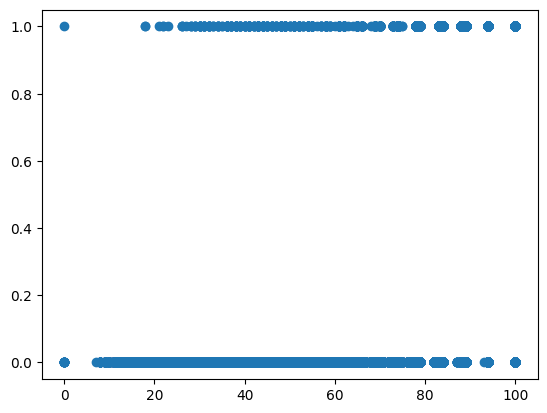

In [75]:
pt.scatter(x = df4.Humidity1, y = df4.Rain_01)

**Histograms after Outliers**

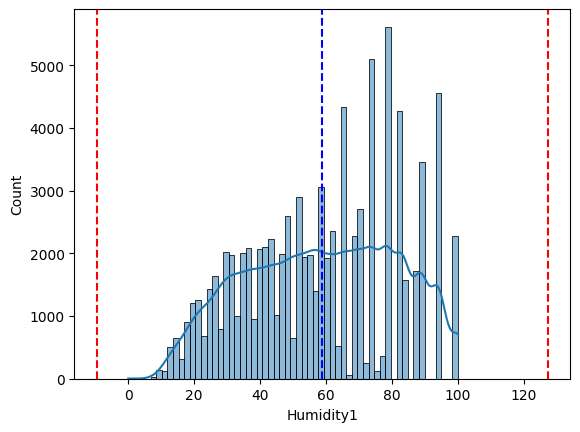

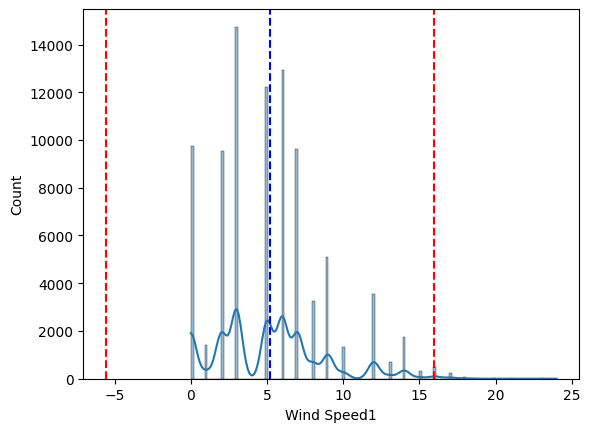

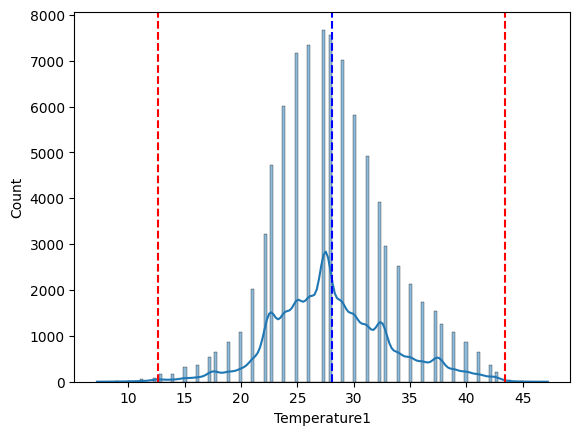

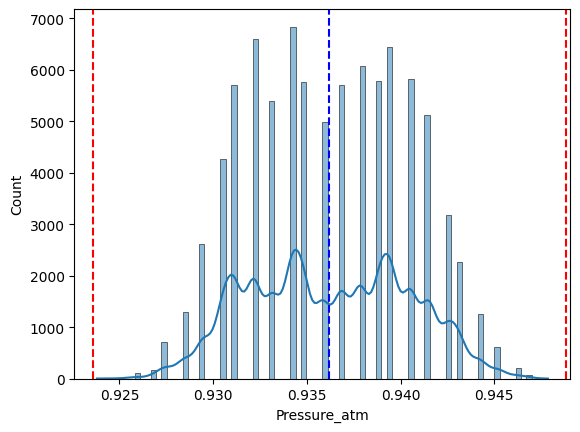

(None, None, None, None)

In [76]:
graph(df4, 'Humidity1'), graph(df4, 'Wind Speed1'), graph(df4, 'Temperature1'), graph(df4, 'Pressure_atm')

In [77]:
rainfall_count = df4.groupby('Rain_01')['Index'].agg('count').reset_index()
rainfall_count

,Rain_01,Index
0,0,82216
1,1,4872


In [78]:
x = rainfall_count.Rain_01
y = rainfall_count.Index

# **Rain & No Rain Count**

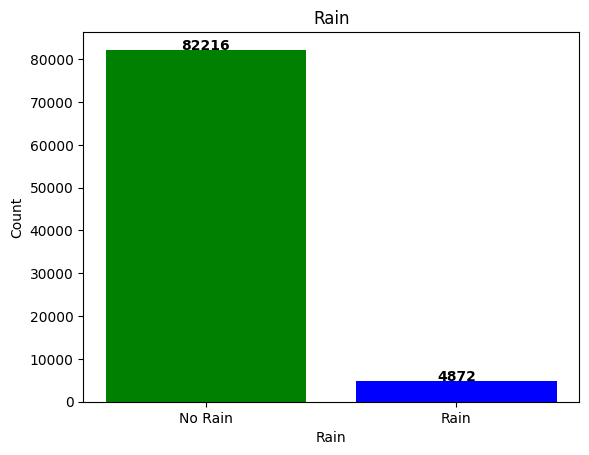

In [79]:
x = ['No Rain', 'Rain']
counts = [82216, 4872]

# Create bar graph
fig, ax = pt.subplots()
ax.bar(x, counts, color = ['g', 'b'])

# Add count labels to each bar
for i, v in enumerate(counts):
    ax.text(i, v+0.5, str(v), ha='center', fontweight='bold')

# Set title and axis labels
ax.set_title('Rain')
ax.set_xlabel('Rain')
ax.set_ylabel('Count')

# Show the graph
pt.show()


In [80]:
df4.head()

,Index,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm,log_Temp1,sqrt_Temp1
0,0,2012-01-01,1:10 AM,72 °F,68 °F,88 °%,CALM,0 °mph,0 °mph,28.09 °in,0.0 °in,Partly Cloudy,22.222222,0.0,28.09,88,0,0.938837,3.101093,4.714045
1,1,2012-01-01,2:10 AM,72 °F,68 °F,88 °%,NNE,3 °mph,0 °mph,28.11 °in,0.0 °in,Partly Cloudy,22.222222,3.0,28.11,88,0,0.939505,3.101093,4.714045
2,2,2012-01-01,3:10 AM,73 °F,66 °F,78 °%,ENE,3 °mph,0 °mph,28.14 °in,0.0 °in,Mostly Cloudy,22.777778,3.0,28.14,78,0,0.940508,3.125785,4.772607
3,3,2012-01-01,4:10 AM,75 °F,68 °F,78 °%,SE,3 °mph,0 °mph,28.17 °in,0.0 °in,Mostly Cloudy,23.888889,3.0,28.17,78,0,0.941511,3.173413,4.887626
4,4,2012-01-01,5:10 AM,75 °F,68 °F,78 °%,SE,5 °mph,0 °mph,28.20 °in,0.0 °in,Mostly Cloudy,23.888889,5.0,28.20,78,0,0.942513,3.173413,4.887626


In [81]:
x = df4.iloc[:, [12, 13, 15, 17]].values

In [82]:
x

array([[22.22222222,  0.        , 88.        ,  0.9388369 ],
       [22.22222222,  3.        , 88.        ,  0.93950535],
       [22.77777778,  3.        , 78.        ,  0.94050802],
       ...,
       [25.        ,  6.        , 39.        ,  0.94251337],
       [23.88888889,  6.        , 41.        ,  0.94251337],
       [23.88888889,  5.        , 41.        ,  0.94318182]])

In [83]:
y = df4.iloc[:, 16].values
y

array([0, 0, 0, ..., 0, 0, 0])

## In independent variable:
The Inputs(x) are Temperature in (C), Wind Speed in mph(meter per hour), Humidity in %, pressure in atm (atmospehre)

The Output(y) is Rain (1), No Rain (0)

Splitting the data for training and testing using stratify

stratify - means carefully splitting the all catagories.

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 42)

**bold Normalizing the data**

In [85]:
norma = Normalizer()
x_train = norma.fit_transform(x_train)
x_test = norma.transform(x_test)

In [86]:
x_train

array([[0.30337344, 0.10921444, 0.94652513, 0.011267  ],
       [0.23537715, 0.03100089, 0.97136132, 0.00968087],
       [0.92743876, 0.        , 0.37341613, 0.02043863],
       ...,
       [0.4195383 , 0.0503446 , 0.90620273, 0.01579999],
       [0.45318681, 0.10413654, 0.88516062, 0.01636995],
       [0.31553982, 0.10876053, 0.94259129, 0.01128883]])

In [87]:
x_test

array([[0.36212929, 0.03990813, 0.9311896 , 0.01247574],
       [0.79727544, 0.10250684, 0.59453969, 0.01915151],
       [0.1346884 , 0.        , 0.99083813, 0.00994192],
       ...,
       [0.55690839, 0.10740376, 0.82342883, 0.01680577],
       [0.27859327, 0.11007832, 0.95401207, 0.01138065],
       [0.69571822, 0.05963299, 0.71559589, 0.01850908]])

In [88]:
def fun_dic(aray):
    unique_values, counts = np.unique(aray, return_counts=True)
    return dict(zip(unique_values, counts))

fun_dic(y_train)

{0: 57551, 1: 3410}

In [89]:
fun_dic(y_test)

{0: 24665, 1: 1462}

# **Over Sampling**

In [90]:
os =  RandomOverSampler(sampling_strategy = 0.65)

In [91]:
x_train_res, y_train_res = os.fit_resample(x_train, y_train)

In [92]:
y_train_res

array([1, 0, 0, ..., 1, 1, 1])

In [93]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 57551, 1: 3410})
Resampled dataset shape Counter({0: 57551, 1: 37408})


# **Training the models**

# **Support Vector Machine**

In [94]:
svc_model = SVC()

In [95]:
svc_model.fit(x_train_res, y_train_res)

SVC()

In [96]:
svc_model.score(x_test, y_test)

0.8159375358824205

In [97]:
y_predicted = svc_model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[20205,  4460],
       [  349,  1113]])

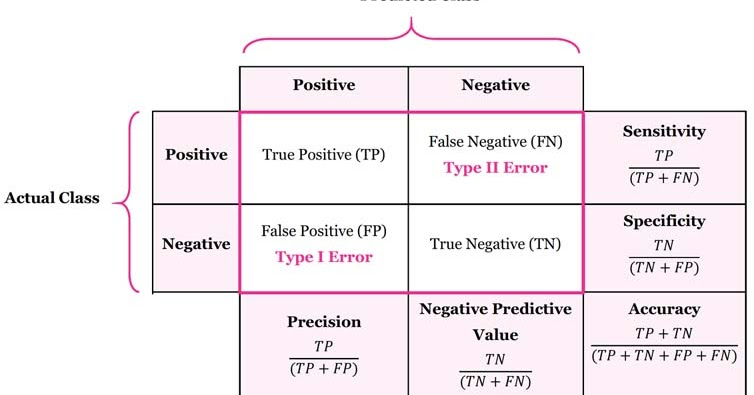

Text(8.222222222222223, 0.5, 'Truth')

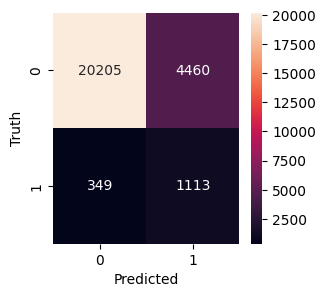

In [98]:
pt.figure(figsize = (3, 3))
sb.heatmap(cm, annot = True, fmt = 'd')
pt.xlabel('Predicted')
pt.ylabel('Truth')

In [99]:
class_report = classification_report(y_test, y_predicted)

In [100]:
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     24665
           1       0.20      0.76      0.32      1462

    accuracy                           0.82     26127
   macro avg       0.59      0.79      0.61     26127
weighted avg       0.94      0.82      0.86     26127



# **Artificial Neural Network (ANN)**

In [101]:
ann = tf.keras.models.Sequential()

In [102]:
ann.add(tf.keras.layers.Dense(units = 7, activation = 'tanh'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'tanh'))


In [103]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [104]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [105]:
ann.fit(x_train_res, y_train_res, batch_size = 32, epochs = 20)

Epoch 1/20
2968/2968 [==============================] - 7s 2ms/step - loss: 0.4878 - accuracy: 0.7786
Epoch 2/20
2968/2968 [==============================] - 7s 2ms/step - loss: 0.4420 - accuracy: 0.8071
Epoch 3/20
2968/2968 [==============================] - 6s 2ms/step - loss: 0.4350 - accuracy: 0.8079
Epoch 4/20
2968/2968 [==============================] - 7s 2ms/step - loss: 0.4309 - accuracy: 0.8078
Epoch 5/20
2968/2968 [==============================] - 7s 2ms/step - loss: 0.4269 - accuracy: 0.8087
Epoch 6/20
2968/2968 [==============================] - 9s 3ms/step - loss: 0.4229 - accuracy: 0.8084
Epoch 7/20
2968/2968 [==============================] - 6s 2ms/step - loss: 0.4199 - accuracy: 0.8122
Epoch 8/20
2968/2968 [==============================] - 7s 2ms/step - loss: 0.4176 - accuracy: 0.8175
Epoch 9/20
2968/2968 [==============================] - 6s 2ms/step - loss: 0.4157 - accuracy: 0.8199
Epoch 10/20
2968/2968 [==============================] - 7s 2ms/step - loss: 0.414

# **Logistic Regression**

In [106]:
LogReg_model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [107]:
LogReg_model.fit(x_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [108]:
LogReg_model.score(x_test, y_test)

0.7314655337390439

In [109]:
y_log_reg_predicted = LogReg_model.predict(x_test)
cr_log = classification_report(y_test, y_log_reg_predicted)
print(cr_log)

              precision    recall  f1-score   support

           0       0.99      0.72      0.84     24665
           1       0.15      0.85      0.26      1462

    accuracy                           0.73     26127
   macro avg       0.57      0.79      0.55     26127
weighted avg       0.94      0.73      0.80     26127



In [110]:
cm_log = confusion_matrix(y_test, y_log_reg_predicted)
cm_log

array([[17870,  6795],
       [  221,  1241]])

# **Random Forest Classifier**

In [111]:
RFC_model = RandomForestClassifier()
RFC_model.fit(x_train_res, y_train_res)


RandomForestClassifier()

In [112]:
RFC_model.score(x_test, y_test)

0.8975389443870325

In [113]:
y_rfc_predicted = RFC_model.predict(x_test)
cr_rfc = classification_report(y_test, y_rfc_predicted)
print(cr_rfc)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     24665
           1       0.30      0.65      0.41      1462

    accuracy                           0.90     26127
   macro avg       0.64      0.78      0.68     26127
weighted avg       0.94      0.90      0.91     26127



In [114]:
cm_rfc = confusion_matrix(y_test, y_rfc_predicted)
cm_rfc

array([[22502,  2163],
       [  514,   948]])

# **bold Naive Bayes**

In [115]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(x_train_res, y_train_res)
NB_model.score(x_test, y_test)

0.9440425613350174

In [116]:
y_nb_predicted = NB_model.predict(x_test)
cm_nb = confusion_matrix(y_test, y_nb_predicted)
cm_nb

array([[24665,     0],
       [ 1462,     0]])

In [117]:
y_ann_predicted = ann.predict(x_test)


817/817 [==============================] - 1s 1ms/step


In [118]:
y_ann_predicted

array([[0.1456542 ],
       [0.04051744],
       [0.03496776],
       ...,
       [0.08789593],
       [0.6928571 ],
       [0.05071945]], dtype=float32)

In [119]:
ann_lst = []
for i in y_ann_predicted:
  if i[0] >= 0.5:
    ann_lst.append([1])
  else:
    ann_lst.append([0])

ann_lst_predicted = np.array(ann_lst)


In [120]:
ann_lst_predicted

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [121]:
cr_ann = classification_report(y_test, ann_lst_predicted)
print(cr_ann)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     24665
           1       0.22      0.77      0.34      1462

    accuracy                           0.83     26127
   macro avg       0.60      0.80      0.62     26127
weighted avg       0.94      0.83      0.87     26127



In [122]:
cm_ann = confusion_matrix(y_test, ann_lst_predicted)
cm_ann

array([[20574,  4091],
       [  333,  1129]])

**Data Preparation for RNN**

In [123]:
df5 = df4[18100:]
df5.head()

,Index,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm,log_Temp1,sqrt_Temp1
18373,18374,2016-05-12,1:00 PM,97 °F,61 °F,30 °%,ESE,9 °mph,0 °mph,27.84 °in,0.0 °in,Partly Cloudy,36.111111,9.0,27.84,30,0,0.930481,3.586601,6.009252
18374,18375,2016-05-12,1:30 PM,95 °F,61 °F,32 °%,SE,6 °mph,0 °mph,27.86 °in,0.0 °in,Haze,35.000000,6.0,27.86,32,0,0.931150,3.555348,5.916080
18375,18376,2016-05-12,2:00 PM,95 °F,59 °F,30 °%,SE,7 °mph,0 °mph,27.89 °in,0.0 °in,Haze,35.000000,7.0,27.89,30,0,0.932152,3.555348,5.916080
18376,18377,2016-05-12,2:30 PM,93 °F,63 °F,36 °%,S,6 °mph,0 °mph,27.89 °in,0.0 °in,Haze,33.888889,6.0,27.89,36,0,0.932152,3.523087,5.821416
18377,18378,2016-05-12,3:00 PM,93 °F,63 °F,36 °%,S,7 °mph,0 °mph,27.89 °in,0.0 °in,Haze,33.888889,7.0,27.89,36,0,0.932152,3.523087,5.821416


In [124]:
df5.shape

(68988, 20)

In [125]:
df5['date_time'] = pd.to_datetime(df5.Date + ' ' + df5.Time, format = '%Y-%m-%d %I:%M %p')

<ipython-input-125-e41f406ef34c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['date_time'] = pd.to_datetime(df5.Date + ' ' + df5.Time, format = '%Y-%m-%d %I:%M %p')


In [127]:
df6 = df5.sort_values('date_time')
df6.head()

,Index,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,...,Condition,Temperature1,Wind Speed1,Pressure1,Humidity1,Rain_01,Pressure_atm,log_Temp1,sqrt_Temp1,date_time
18373,18374,2016-05-12,1:00 PM,97 °F,61 °F,30 °%,ESE,9 °mph,0 °mph,27.84 °in,...,Partly Cloudy,36.111111,9.0,27.84,30,0,0.930481,3.586601,6.009252,2016-05-12 13:00:00
18374,18375,2016-05-12,1:30 PM,95 °F,61 °F,32 °%,SE,6 °mph,0 °mph,27.86 °in,...,Haze,35.000000,6.0,27.86,32,0,0.931150,3.555348,5.916080,2016-05-12 13:30:00
18375,18376,2016-05-12,2:00 PM,95 °F,59 °F,30 °%,SE,7 °mph,0 °mph,27.89 °in,...,Haze,35.000000,7.0,27.89,30,0,0.932152,3.555348,5.916080,2016-05-12 14:00:00
18376,18377,2016-05-12,2:30 PM,93 °F,63 °F,36 °%,S,6 °mph,0 °mph,27.89 °in,...,Haze,33.888889,6.0,27.89,36,0,0.932152,3.523087,5.821416,2016-05-12 14:30:00
18377,18378,2016-05-12,3:00 PM,93 °F,63 °F,36 °%,S,7 °mph,0 °mph,27.89 °in,...,Haze,33.888889,7.0,27.89,36,0,0.932152,3.523087,5.821416,2016-05-12 15:00:00


In [128]:
df6.columns

Index(['Index', 'Date', 'Time', 'Temperature', 'Dew Point', 'Humidity', 'Wind',
       'Wind Speed', 'Wind Gust', 'Pressure', 'Precipitation', 'Condition',
       'Temperature1', 'Wind Speed1', 'Pressure1', 'Humidity1', 'Rain_01',
       'Pressure_atm', 'log_Temp1', 'sqrt_Temp1', 'date_time'],
      dtype='object')

In [129]:
df7 = df6[['Temperature1', 'Wind Speed1', 'Pressure_atm', 'Humidity1', 'date_time', 'Rain_01']]
df7.head()

,Temperature1,Wind Speed1,Pressure_atm,Humidity1,date_time,Rain_01
18373,36.111111,9.0,0.930481,30,2016-05-12 13:00:00,0
18374,35.000000,6.0,0.931150,32,2016-05-12 13:30:00,0
18375,35.000000,7.0,0.932152,30,2016-05-12 14:00:00,0
18376,33.888889,6.0,0.932152,36,2016-05-12 14:30:00,0
18377,33.888889,7.0,0.932152,36,2016-05-12 15:00:00,0


In [130]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

# **Recurrent Neural Network (RNN)**

In [131]:



# Splitting the dataset into train and test sets
train_size = int(len(df7) * 0.7)
test_size = len(df7) - train_size
train, test = df7.iloc[0:train_size], df7.iloc[train_size:len(df7)]

# Normalize the dataset except date_time
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train.drop(columns=['date_time']))
test_norm = scaler.transform(test.drop(columns=['date_time']))

# Convert data into time series format
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 24 # Number of hours to look back
X1_train, y1_train = create_dataset(train_norm, train['Rain_01'].values, time_steps)
X1_test, y1_test = create_dataset(test_norm, test['Rain_01'].values, time_steps)

# Build the model
model_rnn = Sequential()
model_rnn.add(LSTM(units=32, return_sequences=True, input_shape=(X1_train.shape[1], X1_train.shape[2])))
model_rnn.add(Dropout(0.2))
model_rnn.add(LSTM(units=16, return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(LSTM(units=8))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(units=1))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_rnn.fit(X1_train, y1_train, epochs=15, batch_size=32, validation_split=0.1)

# Evaluate the model on test set
model_rnn.evaluate(X1_test, y1_test)

Epoch 1/15
1358/1358 [==============================] - 64s 41ms/step - loss: 0.0403 - val_loss: 0.0164
Epoch 2/15
1358/1358 [==============================] - 54s 40ms/step - loss: 0.0293 - val_loss: 0.0174
Epoch 3/15
1358/1358 [==============================] - 54s 40ms/step - loss: 0.0282 - val_loss: 0.0164
Epoch 4/15
1358/1358 [==============================] - 54s 40ms/step - loss: 0.0275 - val_loss: 0.0160
Epoch 5/15
1358/1358 [==============================] - 53s 39ms/step - loss: 0.0274 - val_loss: 0.0153
Epoch 6/15
1358/1358 [==============================] - 54s 40ms/step - loss: 0.0271 - val_loss: 0.0153
Epoch 7/15
1358/1358 [==============================] - 82s 61ms/step - loss: 0.0268 - val_loss: 0.0154
Epoch 8/15
1358/1358 [==============================] - 55s 40ms/step - loss: 0.0269 - val_loss: 0.0163
Epoch 9/15
1358/1358 [==============================] - 72s 53ms/step - loss: 0.0264 - val_loss: 0.0162
Epoch 10/15
1358/1358 [==============================] - 58s 43m

0.02214869298040867

In [132]:
y_rnn_pred = model_rnn.predict(X1_test)
y_rnn_pred

647/647 [==============================] - 8s 11ms/step


array([[-0.00366947],
       [-0.00060916],
       [ 0.00252844],
       ...,
       [ 0.0026511 ],
       [ 0.00208095],
       [ 0.00191804]], dtype=float32)

In [133]:
y1_train

array([0, 0, 0, ..., 0, 0, 0])

In [134]:
y1_test

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
rnn_lst = []
for i in y_rnn_pred:
  if i[0] >= 0.5:
    rnn_lst.append([1])
  else:
    rnn_lst.append([0])

rnn_lst_predicted = np.array(rnn_lst)


In [136]:
cr_rnn = classification_report(y1_test, rnn_lst_predicted)
print(cr_rnn)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19175
           1       0.83      0.83      0.83      1498

    accuracy                           0.98     20673
   macro avg       0.91      0.91      0.91     20673
weighted avg       0.98      0.98      0.98     20673



In [137]:
cm_rnn = confusion_matrix(y1_test, rnn_lst_predicted)
cm_rnn

array([[18921,   254],
       [  254,  1244]])

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

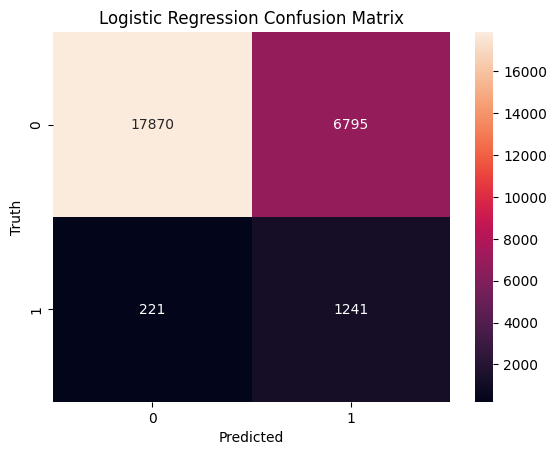

In [138]:
sb.heatmap(cm_log, annot = True, fmt='d')
pt.xlabel('Predicted')
pt.ylabel('Truth')
pt.title('Logistic Regression Confusion Matrix')

Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

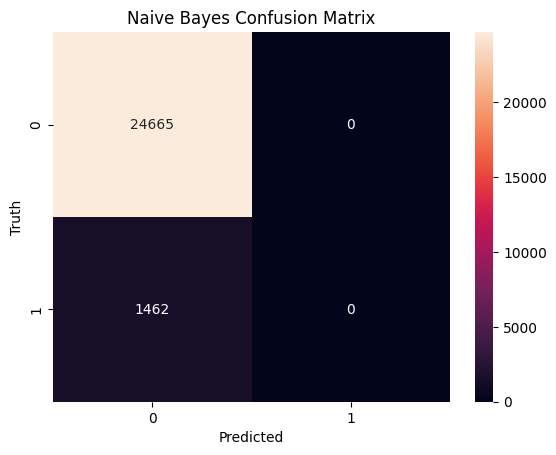

In [139]:
sb.heatmap(cm_nb, annot = True, fmt='d')
pt.xlabel('Predicted')
pt.ylabel('Truth')
pt.title('Naive Bayes Confusion Matrix')

Text(0.5, 1.0, 'ANN Confusion Matrix')

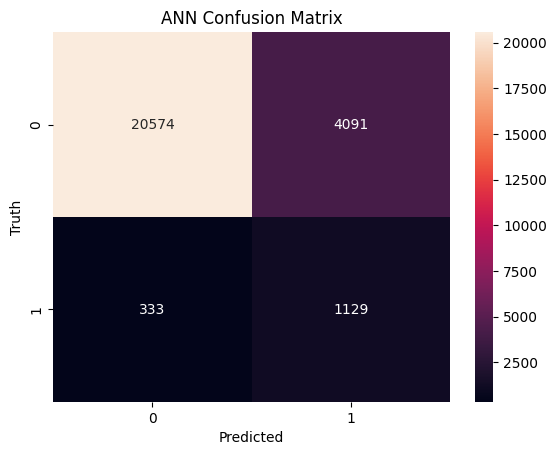

In [140]:
sb.heatmap(cm_ann, annot = True, fmt='d')
pt.xlabel('Predicted')
pt.ylabel('Truth')
pt.title('ANN Confusion Matrix')

Text(0.5, 1.0, 'RNN Confusion Matrix')

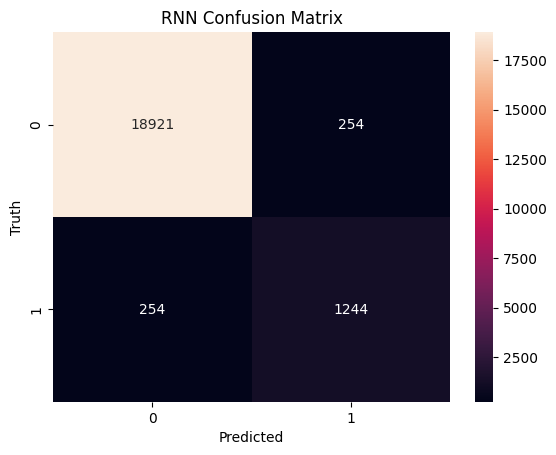

In [141]:
sb.heatmap(cm_rnn, annot = True, fmt='d')
pt.xlabel('Predicted')
pt.ylabel('Truth')
pt.title('RNN Confusion Matrix')

In [142]:
Counter(y_train), Counter(y_test)

(Counter({1: 3410, 0: 57551}), Counter({0: 24665, 1: 1462}))

# **Accuracy of Models**

| Model                    | Accuracy |
|--------------------------|----------|
| Logistic Regression      | 73.1%    |
| Support Vector Machine   | 81.5%    |
| Naive Bayes              | 94.4% (Not predicted any Rain)(Bad Model) |
| ANN                      | 83.0%    |
| Random Forest            | 89.7%    |
| RNN                      | 98.0%    |
